In [1]:
!hostname

31-38-99.wireless.csail.mit.edu


In [2]:
!pwd

/Users/akarshkumar0101/exploration-generalization/atari2


In [54]:
import wandb
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

import hns

In [25]:
def calc_iqm(a, axis=0):
    assert axis==0
    a = np.sort(a, axis=0)
    n = len(a)
    low = int(np.ceil(n*.25))
    high = int(np.ceil(n*.75))
    a = a[low:high]
    return np.nanmean(a, axis=0)

In [4]:
api = wandb.Api()

In [5]:
runs = list(api.runs('akumar01-mit/egb_ftppo'))

In [6]:
run2hist = {run: run.history(samples=100) for run in tqdm(runs)}

  0%|          | 0/516 [00:00<?, ?it/s]

# LOTS of environments

In [43]:
env_ids = sorted(list({run.config['env_ids'][0] for run in runs}))
strategies = sorted(list({run.config['strategy'] for run in runs}))

In [148]:
data = np.empty((len(strategies), len(env_ids)), dtype=object)

for run in tqdm(runs):
    env_id = run.config['env_ids'][0]
    strategy = run.config['strategy']
    i_env_id = env_ids.index(env_id)
    i_strat = strategies.index(strategy)
    
    h = run2hist[run]
    if h.empty:
        continue
    
    if data[i_strat, i_env_id] is None:
        data[i_strat, i_env_id] = []
        
    a = h[f'charts/{env_id}-v5_score'].to_numpy().mean().item()
    # a = h[f'charts/{env_id}-v5_score'].to_numpy()[-1].item()
    data[i_strat, i_env_id].append(a)
    
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i, j] = np.mean(data[i, j])

  0%|          | 0/516 [00:00<?, ?it/s]

In [149]:
strategies

['None', 'best', 'leaf']

In [150]:
mask = (data[0]>0)

a = data[1][mask]/data[0][mask]
b = data[2][mask]/data[0][mask]

In [155]:
np.mean(a), np.mean(b)

(1.5480089919811497, 2.2317780090715686)

In [156]:
np.median(a), np.median(b)

(0.9861008629918658, 0.8492251884195702)

In [157]:
calc_iqm(a), calc_iqm(b)

(0.9776876317623229, 0.8445631050807171)

In [158]:
data.shape

(3, 56)

In [159]:
a = data.copy()

In [160]:
for i, env_id in enumerate(env_ids):
    low, high = hns.atari_human_normalized_scores[f'{env_id}-v5']
    a[:, i] = (a[:, i]-low)/(high-low)

In [161]:
a.mean(axis=-1)

array([0.3938846593670094, 0.3478634686247446, 0.2775194215878293],
      dtype=object)

In [162]:
np.median(a, axis=-1)

array([0.11505379400786359, 0.09259451703046992, 0.08652247597239546],
      dtype=object)

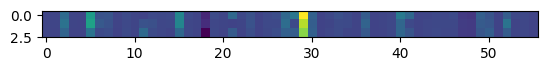

In [163]:
plt.imshow(a.astype(float))

In [164]:
data.argmax(axis=0)

array([0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1,
       2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0])

In [165]:
np.unique(data.argmax(axis=0), return_counts=True)

(array([0, 1, 2]), array([27, 21,  8]))

# 48 environemnts

In [282]:
env_ids = list({run.config['env_ids'][0] for run in runs})
strategies = list({run.config['strategy'] for run in runs})

In [36]:
data = np.empty((len(strategies), len(env_ids)), dtype=object)

for run in tqdm(runs):
    env_id = run.config['env_ids'][0]
    strategy = run.config['strategy']
    i_env_id = env_ids.index(env_id)
    i_strat = strategies.index(strategy)
    
    h = run2hist[run]
    if h.empty:
        continue
    
    if data[i_strat, i_env_id] is None:
        data[i_strat, i_env_id] = []
        
    a = h[f'charts/{env_id}-v5_score'].to_numpy().mean().item()
    # a = h[f'charts/{env_id}-v5_score'].to_numpy()[-1].item()
    data[i_strat, i_env_id].append(a)
    
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i, j] = np.mean(data[i, j])

  0%|          | 0/516 [00:00<?, ?it/s]

In [37]:
strategies

['None', 'best', 'leaf']

In [38]:
mask = ~(data[0]==0)

a = data[1][mask]/data[0][mask]
b = data[2][mask]/data[0][mask]

In [39]:
np.mean(a), np.mean(b)

(1.4815829033061996, 2.095500234554992)

In [40]:
np.median(a), np.median(b)

(0.9861008629918658, 0.8642601248062213)

In [41]:
calc_iqm(a), calc_iqm(b)

(0.9821497017866674, 0.868325505247828)

In [205]:
def calc_iqm(a, axis=0):
    assert axis==0
    a = np.sort(a, axis=0)
    n = len(a)
    low = int(np.ceil(n*.25))
    high = int(np.ceil(n*.75))
    a = a[low:high]
    return np.nanmean(a, axis=0)

In [268]:
with open('atari_games_104.txt') as f:
    env_ids_104 = f.read().split('\n')
with open('atari_games_57.txt') as f:
    env_ids_57 = f.read().split('\n')

In [269]:
env_ids = [env_id for env_id in env_ids_104 if env_id not in env_ids_57]

In [275]:
len(env_ids)

47

In [363]:
data = np.empty((len(strategies), len(env_ids)), dtype=object)
for run in tqdm(runs):
    env_id = run.config['env_ids'][0]
    strategy = run.config['strategy']
    i_env_id = env_ids.index(env_id)
    i_strat = strategies.index(strategy)
    h = run2hist[run]
    if h.empty:
        continue
    if data[i_strat, i_env_id] is None:
        data[i_strat, i_env_id] = []
    a = h[f'charts/{env_id}-v5_score'].to_numpy()
    if len(a)==100:
        data[i_strat, i_env_id].append(a)
    
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i, j] = np.stack(data[i, j])

  0%|          | 0/256 [00:00<?, ?it/s]

/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_9838/4184692098.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(data[1, i].T/base, color=[1, 0, 0, .5])
/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_9838/4184692098.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(data[1, i].T/base, color=[1, 0, 0, .5])
/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_9838/4184692098.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(data[2, i].T/base, color=[0, 1, 0, .5])
/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_9838/4184692098.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(data[2, i].T/base, color=[0, 1, 0, .5])
/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_9838/4184692098.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(data[1, i].mean(0)/base, color=[.5, 0, 0, 1])
/var/folders/ny/19b3c5357vzbxc3hyg919d9r0000gn/T/ipykernel_9838/4184

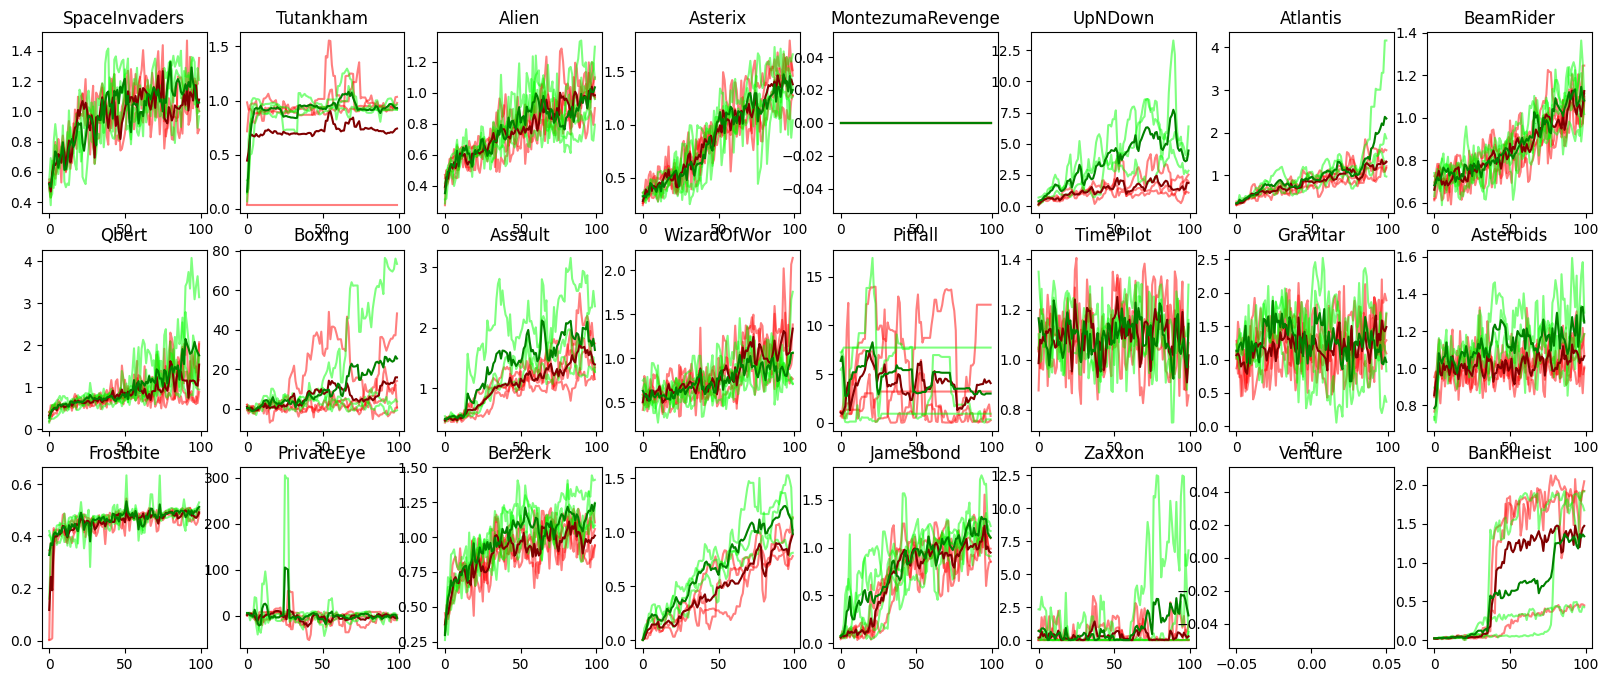

In [397]:
plt.figure(figsize=(20, 8))
i_plot = 0
for i in range(len(env_ids)):
    i_plot += 1
    plt.subplot(3, 8, i_plot)
    
    base = data[0, i].mean()
    
    plt.plot(data[1, i].T/base, color=[1, 0, 0, .5])
    plt.plot(data[2, i].T/base, color=[0, 1, 0, .5])
    plt.plot(data[1, i].mean(0)/base, color=[.5, 0, 0, 1])
    plt.plot(data[2, i].mean(0)/base, color=[0, .5, 0, 1])
    plt.title(env_ids[i])
        